<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [1]:
import numpy as np

In [2]:
print(np.float32(12.123452) - np.float32(12.123450))
valor_real = 0.000002

diff = np.float32(12.123452) - np.float32(12.123450)

error = abs(diff-valor_real)/valor_real*100 #en porcentaje al multiplicar por 100

(12.123452/valor_real)*1/(2**31)
print(error)

1.9073486e-06
4.632568359374996


In [3]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [4]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [5]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [6]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [7]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [8]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [10]:
def exponencial(x,N):
  exp = 0
  for i in range(N):
    exp += (-1)**i *x**i/factorial(i)
  return exp

In [11]:
x = 0.1
N = 100
e1 = exponencial(x,N)
e_exacto = np.exp(-x)

In [12]:
print(f"{e1}")
print(f"{e_exacto}")

0.9048374180359596
0.9048374180359595


In [13]:
def exponencial_truncado(x,N):
  ex = exponencial(x,N)
  tresh = abs(1e-7*ex)
  exp_ = 0
  for i in range(N):
    exp_ = abs((-x)**(i+1)/factorial(i+1))
    if exp_ <= tresh:
      break
  exp = exponencial(x,i)
  return exp, i

In [14]:
x = 0.1
N = 100
exacto = np.exp(-x)
print(f"Valor de la serie: {exponencial(x,N)}")
print(f"Valor de la serie truncado: {exponencial_truncado(x,N)}")
print(f"Valor excto: {exacto}")

Valor de la serie: 0.9048374180359596
Valor de la serie truncado: (0.9048333333333334, 4)
Valor excto: 0.9048374180359595


In [15]:
x = 6
N = 100
exacto = np.exp(-x)
print(f"Valor de la serie: {exponencial(x,N)}")
print(f"Valor de la serie truncado: {exponencial_truncado(x,N)}")
print(f"Valor excto: {exacto}")

Valor de la serie: 0.0024787521766645613
Valor de la serie truncado: (0.0024787514789560493, 30)
Valor excto: 0.0024787521766663585


In [16]:
x = 0.1
N = 100
exacto = np.exp(-x)
print(f"Valor de la serie: {exponencial(x,N)}")
print(f"Valor de la serie truncado: {exponencial_truncado(x,N)}")
print(f"Valor excto: {exacto}")
N = 100
exacto = np.exp(-x)
print(f"Valor de la serie: {exponencial(x,N)}")
print(f"Valor de la serie truncado: {exponencial_truncado(x,N)}")
print(f"Valor excto: {exacto}")

Valor de la serie: 0.9048374180359596
Valor de la serie truncado: (0.9048333333333334, 4)
Valor excto: 0.9048374180359595
Valor de la serie: 0.9048374180359596
Valor de la serie truncado: (0.9048333333333334, 4)
Valor excto: 0.9048374180359595


In [17]:
def invertida(x,N):
  exp = 0
  for i in range(N):
    exp += x**i/factorial(i)
  return 1/exp

In [18]:
x = 10
N = 100
exacto = np.exp(-x)
print(f"Valor de la serie: {exponencial(x,N)}")
print(f"Valor de la serie invertida: {invertida(x,N)}")
print(f"Valor excto: {exacto}")

Valor de la serie: 4.5399929433607724e-05
Valor de la serie invertida: 4.539992976248486e-05
Valor excto: 4.5399929762484854e-05


In [19]:
x = 0.1
n = 20
N = np.arange(1,100,1)

exp1_ = np.zeros(len(N))

exp2_ = np.zeros(len(N))

for i,n in enumerate(N):
  exp1_[i] = exponencial(x,n)
  exp2_[i] = invertida(x,n)


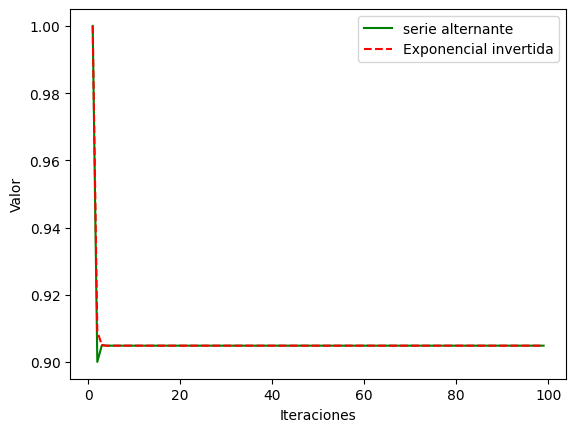

In [20]:
plt.figure()
plt.plot(N,exp1_, "g-", label = "serie alternante")
plt.plot(N,exp2_, "r--", label="Exponencial invertida")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Valor")
plt.show()

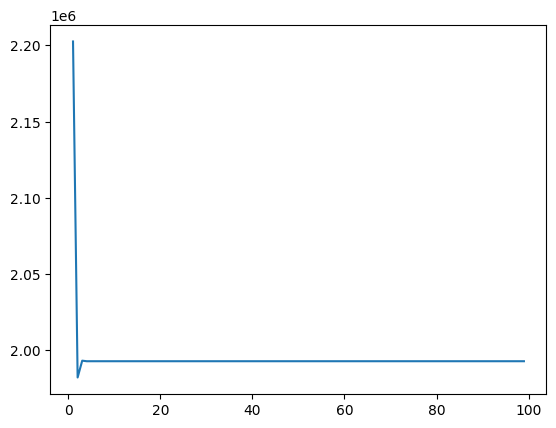

In [21]:
x = 10
N = np.arange(1,100,1)
exacto = np.exp(-x)
error = abs(exp1_-exacto)/exacto*100

plt.plot(N, error)

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$

In [22]:
import numpy as np
def s1(N):
  suma = 0
  for i in range(1, N+1):
    suma += ((-1)**i) * (i / (i+1))
  return suma

def s2(N):
  s2_1 = 0.0
  s2_2 = 0.0
  for i in range(1, N+1):
    s2_1 += ((2*i)-1) / (2*i)
    s2_2 += (2*i) / ((2*i)+1)
  return -s2_1 + s2_2

def s3(N):
  suma = 0
  for i in range(1, N+1):
    suma += 1 / ((2*i) * ((2*i) + 1))
  return suma

def error_relativo(S, S_exacta):
  return np.abs((S - S_exacta) / S_exacta)


Estudiar la convergencia de la serie para los tres casos.

In [23]:
import matplotlib.pyplot as plt

N = int(1e4)
N_values = np.arange(1, N+1)

S1_values = np.array([s1(n) for n in N_values])
S2_values = np.array([s2(n) for n in N_values])
S3_values = np.array([s3(n) for n in N_values])

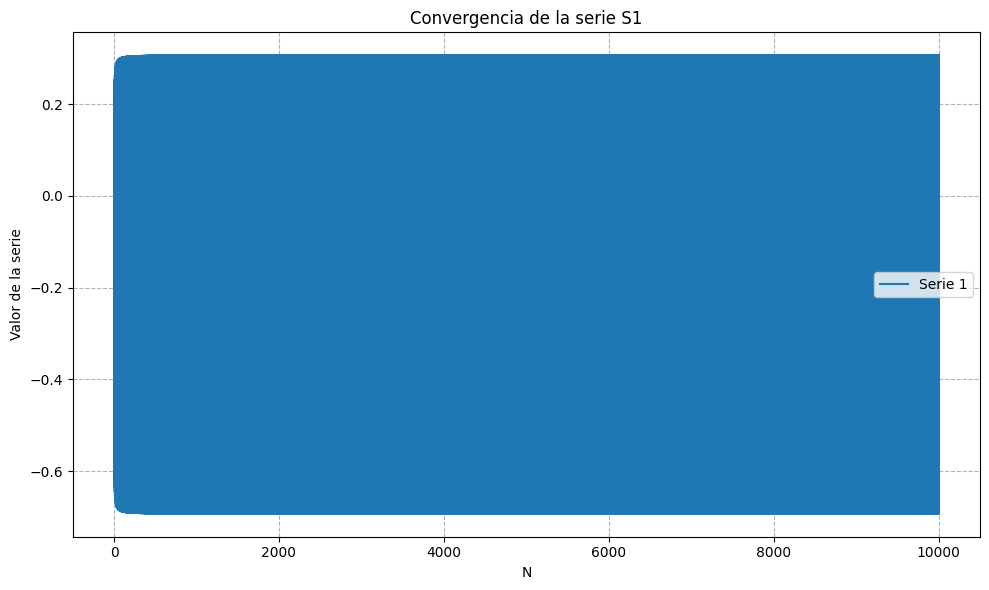

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, S1_values, label='Serie 1')
plt.title('Convergencia de la serie S1')
plt.xlabel('N')
plt.ylabel('Valor de la serie')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

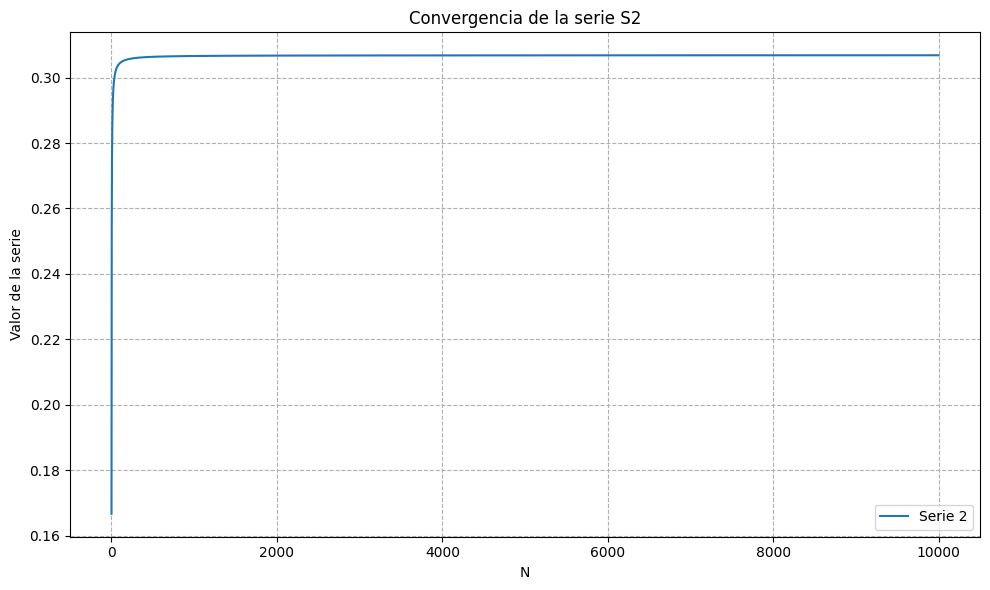

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, S2_values, label='Serie 2')
plt.title('Convergencia de la serie S2')
plt.xlabel('N')
plt.ylabel('Valor de la serie')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

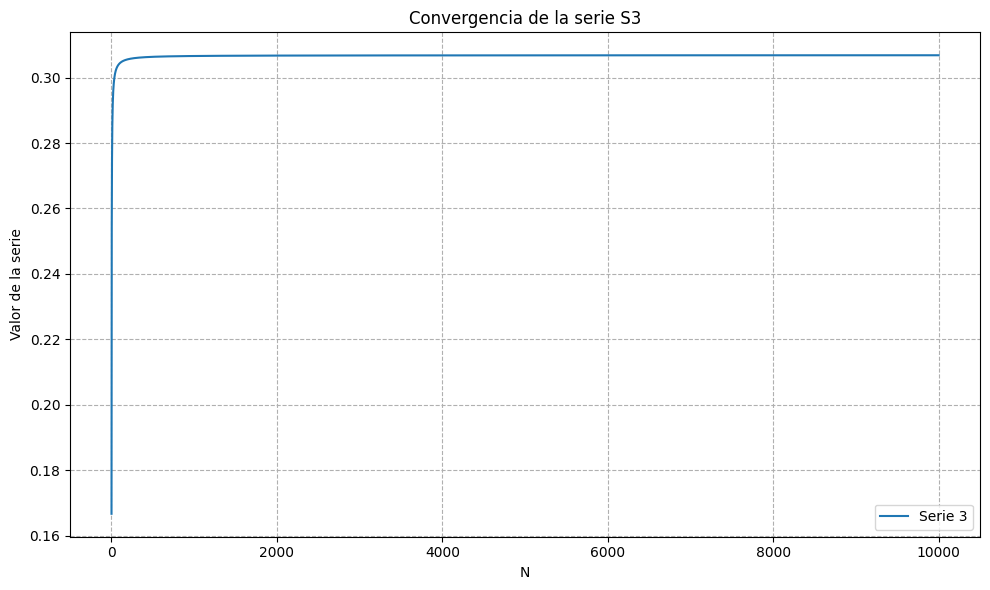

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, S3_values, label='Serie 3')
plt.title('Convergencia de la serie S3')
plt.xlabel('N')
plt.ylabel('Valor de la serie')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

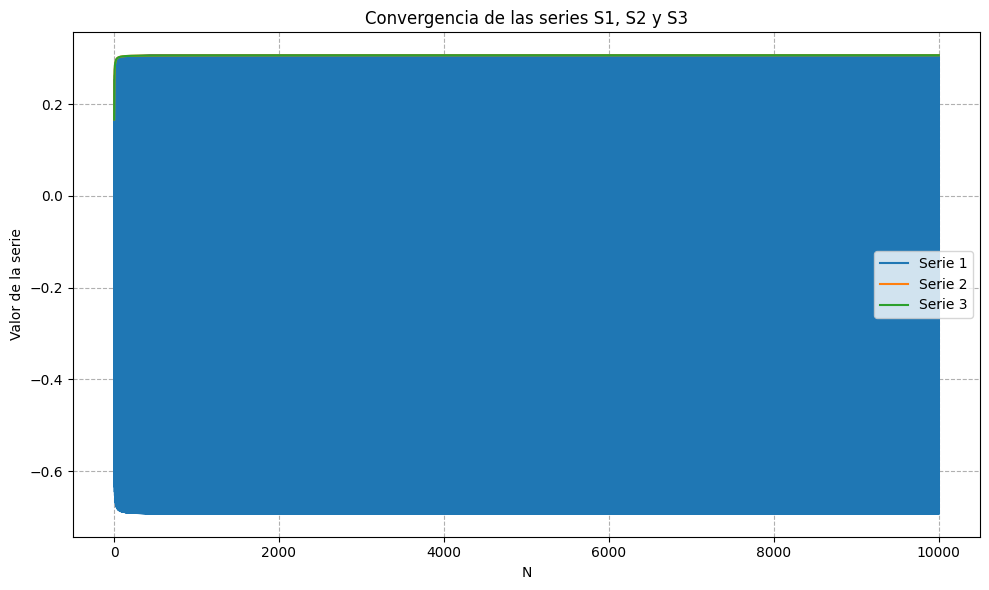

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, S1_values, label='Serie 1')
plt.plot(N_values, S2_values, label='Serie 2')
plt.plot(N_values, S3_values, label='Serie 3')
plt.title('Convergencia de las series S1, S2 y S3')
plt.xlabel('N')
plt.ylabel('Valor de la serie')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

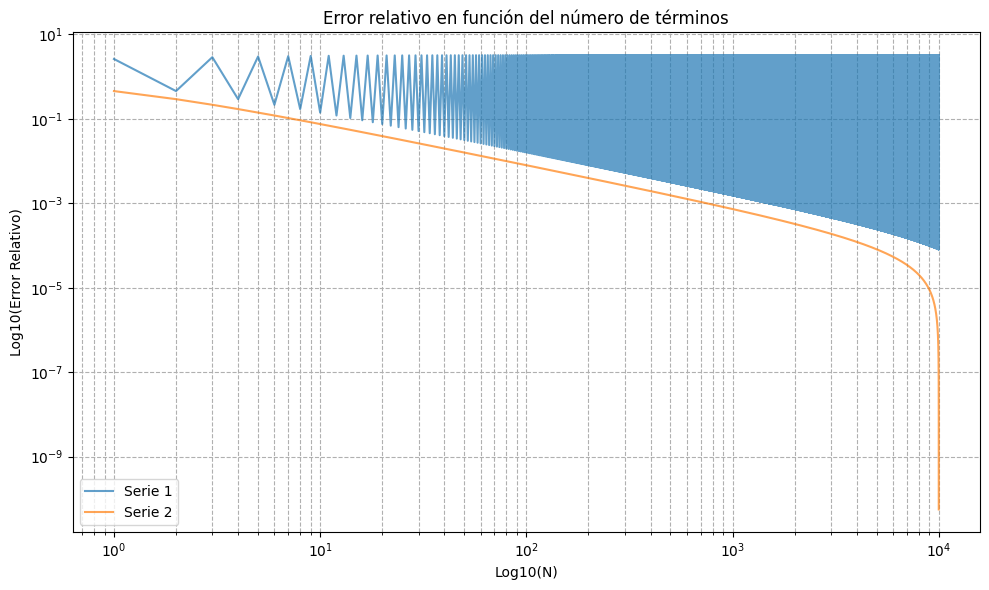

In [28]:
def error_relativo(S, S_exacta):
    return np.abs((S - S_exacta) / S_exacta)

exact_solution = S3_values[-1]

errors = [error_relativo(S1_values, exact_solution),
          error_relativo(S2_values, exact_solution)]

plt.figure(figsize=(10, 6))
for i, error in enumerate(errors):
    plt.loglog(N_values, error, label=f'Serie {i+1}', alpha=0.7)
plt.title('Error relativo en función del número de términos')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(Error Relativo)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

# Análisis y Discusión de Resultados

## Convergencia de las Series

Al observar el gráfico de convergencia de las series $S_N^{(1)}$ ,$S_N^{(2)}$ y $S_N^{(3)}$, podemos ver que las tres series convergen a medida que aumenta el número de términos \(N\). La serie $S_N^{(3)}$ parece converger más rápidamente que las otras dos series. Esto puede atribuirse a la forma analítica de la serie $S_N^{(3)}$ y cómo se calculan sus términos.

## Error Relativo en Función del Número de Términos

Al observar los gráficos log-log del error relativo en función de $\log_{10}(N)$ para las series $S_N^{(1)}$ y $S_N^{(2)}$, podemos ver cómo disminuye el error relativo a medida que aumenta $(N)$. Aunque ambas series convergen, el error relativo para $S_N^{(1)}$ parece ser ligeramente mayor que para $S_N^{(2)}$ en la mayoría de los casos. Esto puede deberse a la forma en que se suman los términos en cada serie y cómo se cancelan los errores.

En general, estos resultados sugieren que las tres series convergen a medida que aumenta $(N)$, pero la serie $S_N^{(3)}$ converge más rápidamente y tiene un menor error relativo en comparación con las otras dos series. Esto resalta la importancia de elegir una representación analítica adecuada para calcular series numéricas, ya que puede conducir a una convergencia más rápida y una mayor precisión en los resultados.

##Nota
Es importante tener en cuenta que la generación de las gráficas puede requerir un tiempo considerable debido al gran número de puntos que se están calculando y trazando. Este tiempo de ejecución prolongado es especialmente relevante para valores grandes de $(N)$. Se recomienda tener paciencia al ejecutar el código y considerar el tiempo necesario para generar las visualizaciones.
